In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Librerias

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
imagenes_test = os.listdir('drive/MyDrive/PROYECTO IA - DETECCION DE TUMORES CEREBRRALES/data de prueba')
imagenes_test[0:5]

['N37.jpg', 'N25.jpg', 'N13.jpeg', 'N135.jpg', 'N36.jpg']

In [3]:
imagenes = os.listdir('drive/MyDrive/PROYECTO IA - DETECCION DE TUMORES CEREBRRALES/data_cerebro/Brain Tumor/Brain Tumor')
np.size(imagenes)

3762

In [4]:
ruta_imagenes = ['drive/MyDrive/PROYECTO IA - DETECCION DE TUMORES CEREBRRALES/data_cerebro/Brain Tumor/Brain Tumor/'+ x for x in imagenes]
ruta_imagenes[3761]

'drive/MyDrive/PROYECTO IA - DETECCION DE TUMORES CEREBRRALES/data_cerebro/Brain Tumor/Brain Tumor/Image1578.jpg'

# Preprocesamiento

In [5]:
path  = r'drive/MyDrive/PROYECTO IA - DETECCION DE TUMORES CEREBRRALES/data_cerebro/Brain Tumor.csv'
data = pd.read_csv(path)

In [6]:
# Se guardan las imagenes en un array
x_image = np.zeros([3762,240,240,3], dtype = np.uint8)

for i in range(0,3762): # 3762 imagenes
    x_image[i] = cv2.imread('drive/MyDrive/PROYECTO IA - DETECCION DE TUMORES CEREBRRALES/data_cerebro/Brain Tumor/Brain Tumor/Image{}.jpg'.format(i+1)) # si dio buenos resultados al modelo
    #x_image[i] = cv2.imread(ruta_imagenes[i]) # no dio buenos resultados al modelo
    
y_image = np.array(data['Class'], dtype=np.uint8)

print("Formato del dato x_image: {} {}".format(x_image.shape, x_image.dtype))
print("Formato del dato y_image: {} {}".format(y_image.shape, y_image.dtype))

Formato del dato x_image: (3762, 240, 240, 3) uint8
Formato del dato y_image: (3762,) uint8


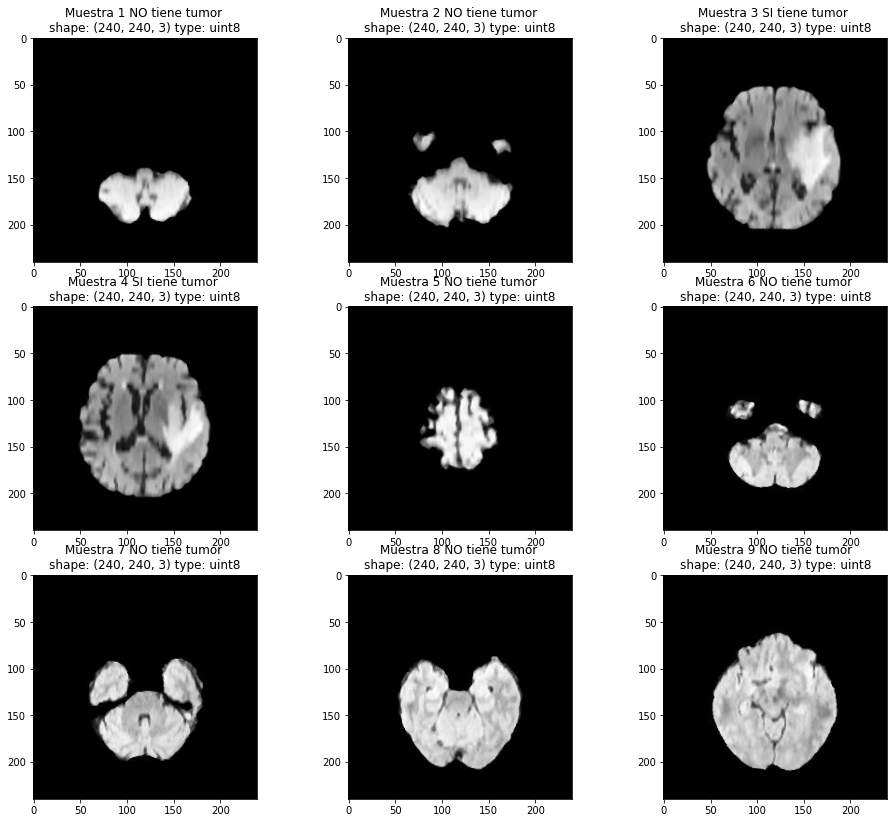

In [7]:
# Se plotea las N primeras muestras (N = m*n)
m = 3 # Numero de filas
n = 3 # Numero de columnas
f, axs = plt.subplots(m, n, figsize = (16,14), squeeze=False)

N=0
for i in range(0,m):
    for j in range(0,n):
        N += 1 
        axs[i,j].imshow(x_image[N-1])
        if y_image[N-1] == 1:
            txt = 'SI tiene tumor'
        else:
            txt = 'NO tiene tumor'
            
        axs[i,j].set_title("Muestra {} {} \nshape: {} type: {}".format(N ,txt , x_image[N-1].shape, x_image[N-1].dtype))

plt.show()

In [8]:
# Se separa los datos en entrenamiento y prueba para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x_image,y_image, test_size=0.3)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2633, 240, 240, 3)
(2633,)
(1129, 240, 240, 3)
(1129,)


In [10]:
# Reshape the training and test examples 
train_x_flatten = x_train.reshape(x_train.shape[0], -1)   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = x_test.reshape(x_test.shape[0], -1)

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

# Standardize data to have feature values between 0 and 1.
train_y = y_train.reshape((-1,1))
test_y = y_test.reshape((-1,1))

print ("train_y's shape: " + str(train_y.shape))
print ("test_y's shape: " + str(test_y.shape))

train_x's shape: (2633, 172800)
test_x's shape: (1129, 172800)
train_y's shape: (2633, 1)
test_y's shape: (1129, 1)


# Implementacion de Redes Neuronales Artificiales

In [11]:
import tensorflow as tf
import tensorflow.keras as kr

lr = 0.005
nn = [512, 256, 128, 1]

model = kr.Sequential()

l1 = model.add(kr.layers.Dense(nn[1], activation='tanh'))
l2 = model.add(kr.layers.Dense(nn[2], activation='tanh'))
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=lr), metrics=['acc'])

In [12]:
# Y entrenamos al modelo. Los callbacks 
hist = model.fit(train_x, train_y, epochs=200, verbose=1, validation_data=(test_x, test_y), batch_size=128)

Epoch 1/200
21/21 [==============================] - 4s 96ms/step - loss: 0.2547 - acc: 0.6361 - val_loss: 0.1413 - val_acc: 0.8096
Epoch 2/200
21/21 [==============================] - 1s 61ms/step - loss: 0.1439 - acc: 0.8003 - val_loss: 0.1351 - val_acc: 0.8131
Epoch 3/200
21/21 [==============================] - 1s 61ms/step - loss: 0.1432 - acc: 0.8062 - val_loss: 0.1304 - val_acc: 0.8326
Epoch 4/200
21/21 [==============================] - 1s 61ms/step - loss: 0.1287 - acc: 0.8276 - val_loss: 0.1498 - val_acc: 0.7750
Epoch 5/200
21/21 [==============================] - 1s 61ms/step - loss: 0.1351 - acc: 0.8189 - val_loss: 0.1476 - val_acc: 0.7803
Epoch 6/200
21/21 [==============================] - 1s 62ms/step - loss: 0.1346 - acc: 0.8125 - val_loss: 0.1200 - val_acc: 0.8477
Epoch 7/200
21/21 [==============================] - 1s 62ms/step - loss: 0.1243 - acc: 0.8354 - val_loss: 0.1148 - val_acc: 0.8512
Epoch 8/200
21/21 [==============================] - 1s 60ms/step - loss: 0.

In [13]:
score, acc = model.evaluate(test_x, test_y)
print('Test accuracy:', acc)

36/36 [==============================] - 0s 12ms/step - loss: 0.0618 - acc: 0.9203
Test accuracy: 0.9202834367752075


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


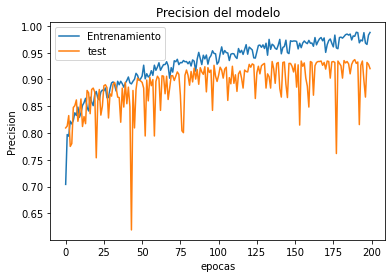

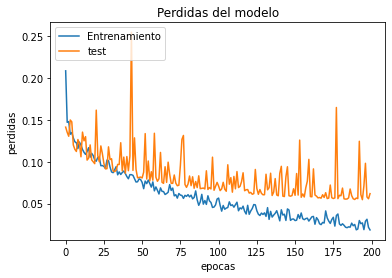

In [14]:
# lista de datos history
print(hist.history.keys())
# hacemos las grafica 1 precision
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()
# hacemos las grafica 2 perdidas
plt.figure(2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

# Prediccion

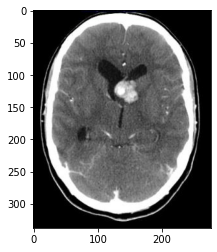

(338, 276, 3)

In [15]:
prueba_1 = cv2.imread('drive/MyDrive/PROYECTO IA - DETECCION DE TUMORES CEREBRRALES/data de prueba/N1.JPG')
plt.figure()
plt.imshow(prueba_1)
plt.show()
prueba_1.shape

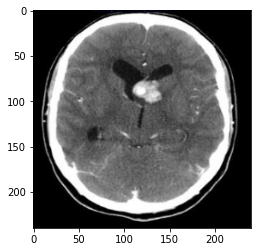

(240, 240, 3)

In [16]:
prueba = cv2.resize(prueba_1, (240,240))
plt.imshow(prueba)
plt.show()
prueba.shape

In [17]:
test = prueba.reshape((1,-1))
test.shape

(1, 172800)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Tiene tumor


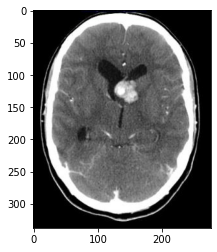

In [18]:
predictions = model.predict_classes(test)
if(predictions==1):
    print("Tiene tumor")
elif(predictions==0):
    print("No tiene tumor")
else:
    print("error")
    
plt.figure()
plt.imshow(prueba_1)
plt.show()